# K-means кластеризація для сегментації користувачів, заснованої на RFM змінних

У цьому ДЗ вирішуватимемо задачу сегментації користувачів, виходячи з їх нещодавності та частоти покупок, а також сум витрат на них.

Імпорти розташуйте під цією клітиною.

In [1]:
import pandas as pd


Будемо використовувати набір даних із наступного джерела: https://archive.ics.uci.edu/ml/datasets/online+retail 

1.Завантажте набір даних із файлу. Виведіть перші 5 записів та розмір набору даних.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 
y = online_retail.data.targets 
  
# metadata 
print(online_retail.metadata) 
  
# variable information 
print(online_retail.variables) 


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [3]:
X.head(20)


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [12]:
X.shape
#print(y)

(541909, 6)

In [9]:
t = X.head (2000)
t.to_csv('small_X_data.csv', index= False, sep=',')


## Підготовка даних

2. Проведіть невеликий аналіз даних.
2.1.Виведіть результат методу describe() для числових колонок. Виведіть кількість унікальних значень у кожній категоріальній колонці.

In [5]:

# Ausgabe der Ergebnisse
print("Beschreibung der numerischen Spalten:")
X.describe()

Beschreibung der numerischen Spalten:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# Identifizierung kategorialer Spalten und Zählung einzigartiger Werte
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
unique_values_count = {col: X[col].nunique() for col in categorical_columns}


print("\nAnzahl einzigartiger Werte in kategorialen Spalten:")
for col, count in unique_values_count.items():
    print(f"{col}: {count}")


Beschreibung der numerischen Spalten:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Anzahl einzigartiger Werte in kategorialen Spalten:
Description: 4223
InvoiceDate: 23260
Country: 38


2.1.1.Як можна пояснити те, що у змінних Quantity і UnitPrice мінімальне значення негативне?

  ## Наявність негативних значень у змінних, як-от Quantity (кількість) та UnitPrice (ціна за одиницю), може вказувати на декілька потенційних сценаріїв в контексті даних про роздрібну торгівлю. Ось кілька можливих пояснень:

    Повернення товарів: Негативні значення в Quantity можуть вказувати на повернення товарів покупцями. Тобто, якщо покупець купує товар, а потім повертає його, це повернення може бути зареєстроване як транзакція з негативною кількістю.

    Корекції помилок: Іноді негативні значення можуть бути результатом корекції помилок у записах. Наприклад, якщо була зроблена помилка при введенні кількості товару або його ціни, корекція може бути внесена як транзакція з негативним значенням для виправлення загального балансу.

    Знижки або від'ємні ціни: У випадку з UnitPrice, негативні значення можуть вказувати на знижки або інші від'ємні нарахування, що застосовуються до певних товарів або замовлень. Це може бути менш звичайним, але можливим в поодиноких випадках.

    Системні транзакції: У деяких системах обліку, негативні значення можуть бути використані для представлення певних внутрішніх або системних транзакцій, які не є прямими продажами або поверненнями товарів, але необхідні для внутрішнього обліку.

Для точного визначення причин наявності негативних значень у вашому конкретному наборі даних, важливо звернутися до документації даних або зв'язатися з особами, які відповідають за збір і обробку цих даних. Вони можуть надати конкретні пояснення та контекст для розуміння цих значень.


2.1.2. Як ви вважаєте, чи варто залишати ці дані (з негативними значеннями Quantity і UnitPrice) у наборі даних, виходячи з задачі, яку ми вирішуємо? Аргументуйте свою відповідь.
Якщо ви вважаєте, що ці рядки треба видалити, видаліть їх.

   У контексті задачі сегментації користувачів, заснованої на нещодавності, частоті покупок та сумі витрат, рішення щодо включення або виключення даних з негативними значеннями для Quantity і UnitPrice залежить від кількох факторів:
Аргументи за збереження даних:

    Повернення товарів як важлива інформація: Повернення можуть бути важливою частиною поведінкового аналізу. Вони вказують на невдоволення покупця або проблеми з продуктом. Сегментація, яка враховує повернення, може допомогти ідентифікувати групи користувачів з високим рівнем повернень.
    Вплив на частоту покупок: Негативні транзакції впливають на загальну частоту взаємодій клієнта з магазином, і їх виключення може спотворити цю картину.

Аргументи проти збереження даних:

    Спотворення витрат: Негативні значення Quantity та UnitPrice можуть спотворити загальні витрати на користувача, зменшивши суму, яку вони фактично витратили.
    Вплив на аналіз: Для задач сегментації, зосереджених на витратах клієнтів та частоті покупок, негативні транзакції можуть ввести плутанину, особливо якщо мета полягає у визначенні найбільш вигідних або активних сегментів користувачів.

Рекомендація:

На мою думку, видалення рядків з негативними значеннями може бути більш відповідним для цієї конкретної задачі сегментації, особливо якщо фокусуємося на позитивних взаємодіях, які відображають фактичні витрати та частоту покупок користувачів. Видалення цих даних допоможе забезпечити, що аналіз відображатиме більш точну картину витрат і взаємодій користувачів, без врахування повернень або корекцій.


In [18]:
# Видалення рядків, де Quantity або UnitPrice є негативними
cleaned_data = X[(X['Quantity'] > 0) & (X['UnitPrice'] > 0)]

# Перевірка розміру даних після очищення
print(f"Розмір оригінальних {cleaned_data.shape}")


Розмір оригінальних (530104, 6)


2.2.Виведіть відсоток відсутніх значень у кожній із колонок.

In [19]:
# Перевірка відсотка відсутніх значень у кожній колонці DataFrame `X`
percent_missing = X.isnull().mean() * 100

# Вивід результатів
print("Відсоток відсутніх значень у кожній колонці:")
print(percent_missing)


Відсоток відсутніх значень у кожній колонці:
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


2.4. Видаліть рядки з відсутніми значеннями.

In [20]:
# Видалення рядків з відсутніми значеннями
X_clean = X.dropna()

# Перевірка розміру нового DataFrame після видалення
print("Розмір DataFrame після видалення рядків з відсутніми значеннями:", X_clean.shape)


Розмір DataFrame після видалення рядків з відсутніми значеннями: (406829, 6)


2.5. Виведіть значення змінної Country, відсортувавши їх за відсотком присутності в даних.
Тобто вгорі має бути значення, яке найчастіше є у даних.

In [21]:
# Перевірка, чи існує колонка 'Country' у DataFrame
if 'Country' in X.columns:
    # Підрахунок відсотка появи кожної країни
    country_presence_percentage = X['Country'].value_counts(normalize=True) * 100

    # Сортування результатів за спаданням
    country_presence_sorted = country_presence_percentage.sort_values(ascending=False)

    # Виведення результатів
    print(country_presence_sorted)
else:
    print("Колонка 'Country' не знайдена у DataFrame.")


Country
United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United

2.6.У наборі даних є значення змінної Country, яке зустрічається найчастіше.
Відфільтруйте дані лише до тих записів, які мають значення змінної Country. Це спростить нам задачу, до того ж для інших значень Country обмаль даних.

In [11]:
most_common_country = X['Country'].mode()[0]
most_common_country

'United Kingdom'

In [13]:
filtered_X = X[X['Country'] == most_common_country]
filtered_X # only country Unarted Kindom

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541889,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [17]:
filtered_X = X.dropna(subset =['Country'])
filtered_X # all possible countries that are not missed

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


2.7. Створіть стовпець Date із значень у стовпці InvoiceDate. Стовпець Date повинен містити дату у форматі рік-місяць-день, наприклад "2021-10-24".

In [20]:

filtered_X['Date'] = pd.to_datetime(filtered_X ['InvoiceDate']).dt.date
filtered_X

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09


Отже, на даний момент у нас є всі необхідні дані для вирішення задачі:
- Customer ID
- Unit Price
- Quantity
- Invoice Date

## RFM

Давність-частота-грошовий вираз (Recency-Frequency-Monetary)
    
    
RFM-аналіз дозволяє сегментувати клієнтів за частотою та вартістю покупок та визначати тих клієнтів, які витрачають найбільше грошей.

* Давність - скільки часу пройшло з того часу, як клієнт щось купив у нас.
* Частота - як часто клієнт купує у нас.
* Грошовий вираз - загальна вартість покупок, здійснених покупцем.

Логічно припустити з опису вище, що **дані мають бути згруповані за клієнтами**. Інакше немає сенсу виводити Recency та Частоту.

3.1.Визначте останню дату транзакції у наборі даних. Ця дата нам необхідна, щоб визначати, як давно користувач робив покупку. Але дані історичні і якщо ми візьмемо для розрахунку recency фактичну сьогоднішню дату, розподіл recency буде зрушений у бік кількох сотень днів.
Щоб розподіл recency розпочинався з нуля, за дату "сьогодні" ми візьмемо дату останньої транзакції в наборі даних. Запишіть знайдену дату змінної NOW.

In [24]:
# Визначення останньої дати транзакції у наборі даних
NOW = filtered_X['Date'].max()

# Виведення останньої дати
print(NOW)


2011-12-09


### Recency

3.2.У змінну R_df запишіть recency dataframe, що складається з колонок CustomerID, Last_Purchase_Date та Recency,
де     
   - Last_Purchase_Date - це дата останньої покупки клієнта;
   - Recency - скільки днів минуло з дати останньої покупки клієнта до NOW.

In [28]:
# Групування даних за CustomerID для визначення дати останньої покупки
R_df= filtered_X.groupby('CustomerID').agg(Last_Purchase_Date=('Date', 'max')).reset_index()

# Розрахунок Recency як різниця між NOW і Last_Purchase_Date
R_df['Recency'] = (pd.to_datetime(NOW) - pd.to_datetime(R_df['Last_Purchase_Date'])).dt.days



# Виведення перших кількох рядків R_df для перевірки
R_df.head()


,CustomerID,Last_Purchase_Date,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


### Frequency - Monetary

3.3.Створіть Frequency - Monetary dataframe у змінній FM_df.  
Датафрейм повинен містити
- CustomerID - ідентифікатор клієнта
- Frequency - кількість покупок клієнта (кількість унікальних інвойсів)
- Monetary - скільки грошей у магазині витратив клієнт

In [30]:
# Розрахунок Frequency - кількість покупок для кожного клієнта
frequency = filtered_X.groupby('CustomerID').size().reset_index(name='Frequency')

# Розрахунок Monetary - сума витрат для кожного клієнта
monetary = filtered_X.groupby('CustomerID')['UnitPrice'].sum().reset_index(name='Monetary')

# Об'єднання Frequency і Monetary в один DataFrame
FM_df = frequency.merge(monetary, on='CustomerID')

# Перегляд перших кількох рядків результату
print(FM_df.head())


   CustomerID  Frequency  Monetary
0     12346.0          2      2.08
1     12347.0        182    481.21
2     12348.0         31    178.71
3     12349.0         73    605.10
4     12350.0         17     65.30


### RFM
3.4.Створіть RFM_df, який є об'єднанням R_df та FM_df за ідентифікатором клієнта.

In [31]:
# Об'єднання R_df і FM_df для створення RFM_df за ідентифікатором клієнта
RFM_df = R_df.merge(FM_df, on='CustomerID')

# Виведення перших кількох рядків RFM_df для перевірки
print(RFM_df.head())


   CustomerID Last_Purchase_Date  Recency  Frequency  Monetary
0     12346.0         2011-01-18      325          2      2.08
1     12347.0         2011-12-07        2        182    481.21
2     12348.0         2011-09-25       75         31    178.71
3     12349.0         2011-11-21       18         73    605.10
4     12350.0         2011-02-02      310         17     65.30


## K-means для RFM сегментації

K-means дає кращий результат за наступних умов:
- Розподіл даних не спотворений (тобто немає довгих хвостів)
- Дані стандартизовані (тобто середнє значення 0 та стандартне відхилення 1).

4.1.Побудуйте діаграми розподілу даних (наприклад, sns.distplot) для колонок Recency, Frequency і Monetary RFM_df.
Виведіть коефіцієнт асиметрії кожної з колонок.

Recency Skewness:  1.2493697309912783
Frequency Skewness:  18.15373495399194
Monetary Skewness:  22.375198711981614


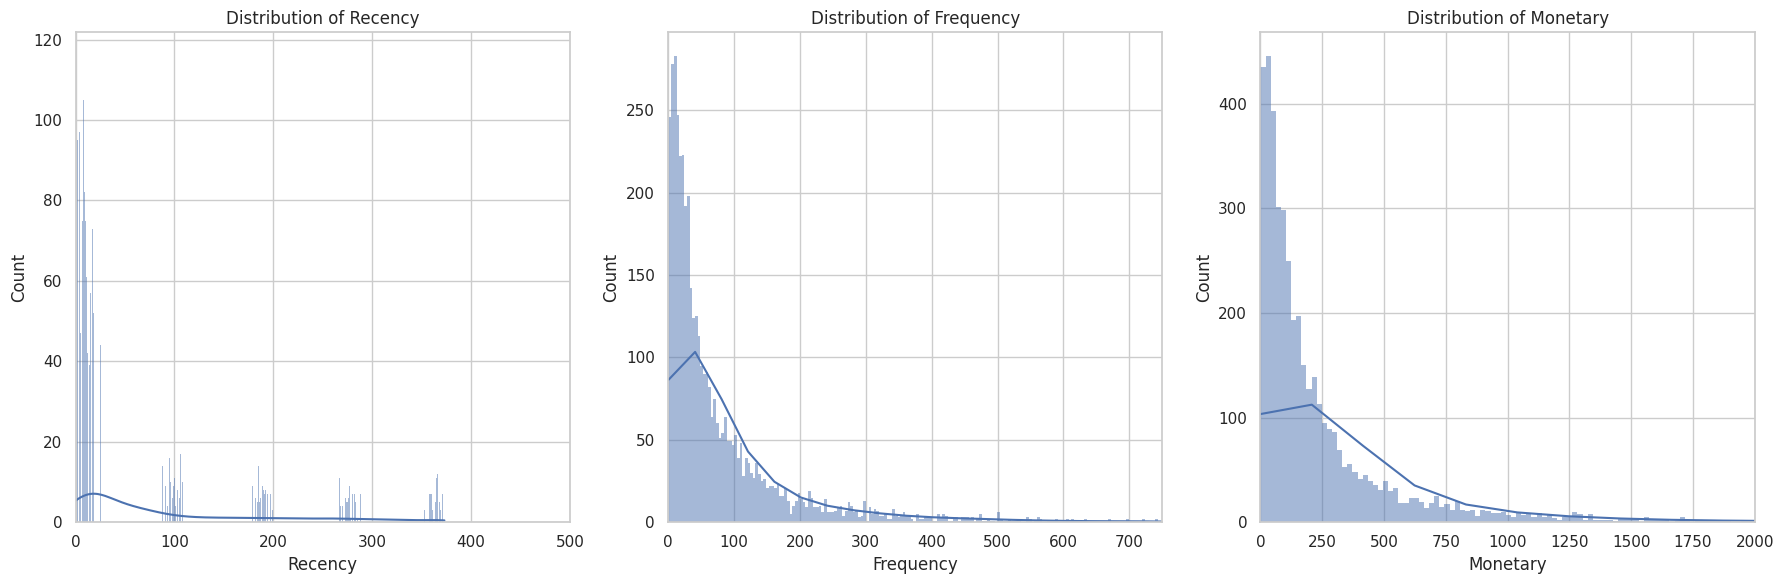

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# Побудова діаграм розподілу для Recency

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(RFM_df['Recency'], bins=2000, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Recency')
ax[0].set_xlim([0, 500])

sns.histplot(RFM_df['Frequency'], bins=2000, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Frequency')
ax[1].set_xlim([0, 750])

sns.histplot(RFM_df['Monetary'], bins=2000, kde=True, ax=ax[2])
ax[2].set_title('Distribution of Monetary')
ax[2].set_xlim([0, 2000])

plt.tight_layout()

# Виведення коефіцієнта асиметрії
print("Recency Skewness: ", RFM_df['Recency'].skew())
print("Frequency Skewness: ", RFM_df['Frequency'].skew())
print("Monetary Skewness: ", RFM_df['Monetary'].skew())


Дані сильно перекручені, тому ми виконаємо над ними log перетворення, щоб зменшити асиметрію кожної змінної.

4.2.Над кожною зі змінних 'Recency', 'Frequency', 'Monetary' виконайте перетворення log(x+1).   
Додаємо константу, оскільки log перетворення вимагає, щоб усі значення були позитивними.
Відобразіть розподіл змінних після перетворення.

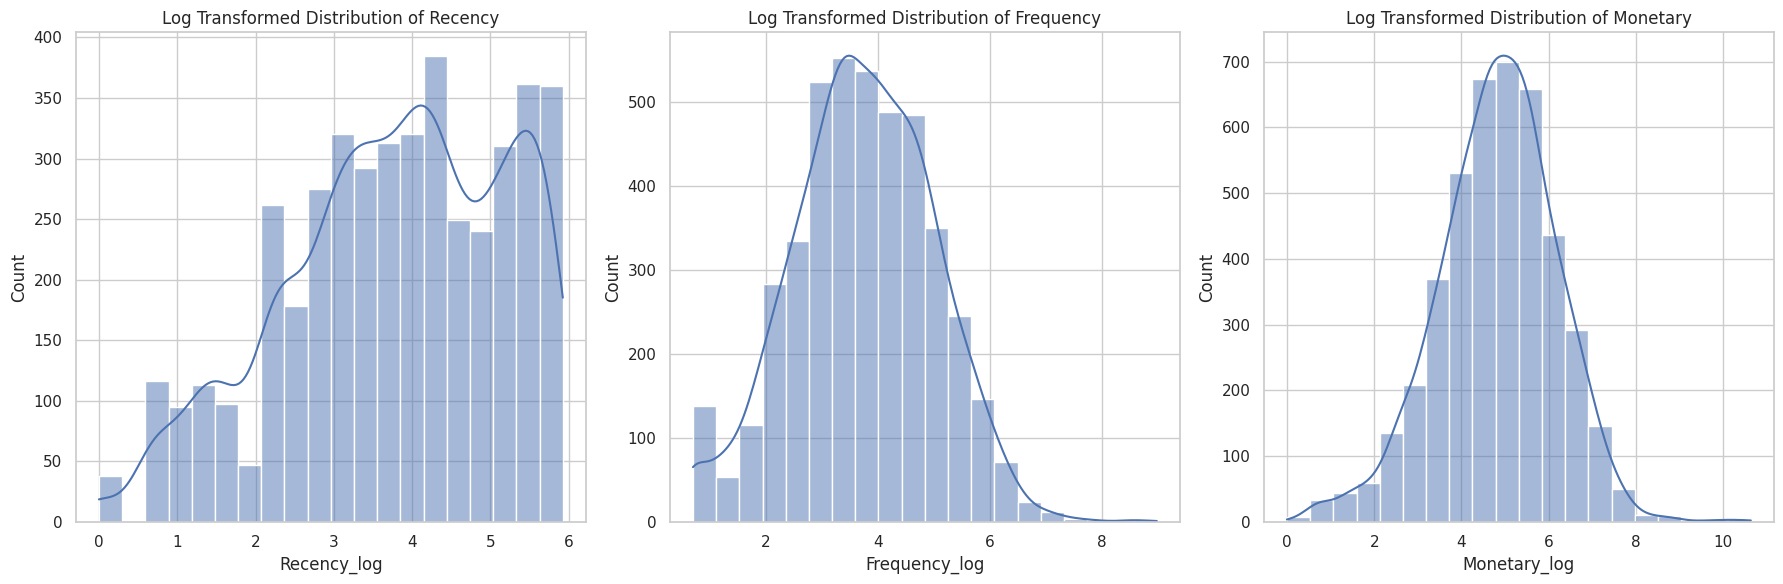

In [38]:
import numpy as np

# Performing log transformation on 'Recency', 'Frequency', 'Monetary'
RFM_df['Recency_log'] = np.log(RFM_df['Recency'] + 1)
RFM_df['Frequency_log'] = np.log(RFM_df['Frequency'] + 1)
RFM_df['Monetary_log'] = np.log(RFM_df['Monetary'] + 1)

# Creating distribution plots for variables after log transformation
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(RFM_df['Recency_log'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Log Transformed Distribution of Recency')

sns.histplot(RFM_df['Frequency_log'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Log Transformed Distribution of Frequency')

sns.histplot(RFM_df['Monetary_log'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Log Transformed Distribution of Monetary')

plt.tight_layout()
plt.show()


4.3.Бачимо, що в нас все одно залишилися хвости. Приберемо їх з використанням техніки **Winsorizing**.    

Прочитайте про неї тут: https://en.wikipedia.org/wiki/Winsorizing.    

Для використання техніки будемо використовувати бібліотеку [feature_engine](https://feature-engine.readthedocs.io/en/1.1.x/).    
Встановіть її.


Нам потрібний об'єкт Winsorizer. Імпортуйте його за допомогою
`from feature_engine.outliers import Winsorizer`.

У змінній windsoriser створіть екземпляр класу Winsorizer зі значеннями змінних 'tail='both'', 'fold=2', а в 'variables' передайте назви змінних, які ми хочемо перетворити.
Викличте метод fit().

In [ ]:
# ваш код тут
windsoriser = Winsorizer(...)

Викликаємо трансформацію:

In [ ]:
... = windsoriser.transform(...)

4.4. Стандартизуйте наші RFM змінні так, щоб середнє було 0, а стандартне відхилення дорівнювало 1. Тут не треба ділити на трейн і тест, можемо працювати разом з повним набором даних.

In [ ]:
# ваш код тут

4.5. Знайдіть оптимальну кількість кластерів за допомогою Elbow Method.
Запустіть KMeans кластеризацію підготовлених стандартизованих RFM даних з параметром K від 1 до 10 включно.
Виконати це можна у циклі.
Відобразіть графічно отримані результати про значення сум внутрішньокластерних відстаней (у sklearn його називають inertia) для різних значень K.

In [ ]:
# ваш код тут

Значення кластера, при якому зменшення значення inertia стає постійним, можна вибрати як правильне значення кластера для наших даних.
Спробуємо використовувати значення К від 3 до 5.

4.6.Створіть функцію, яка прийматиме набір даних для навчання (стандартизовані дані), значення К та набір даних з оригінальними (до стандартизації) значеннями (назвем його original_df_rfm).

Усередині функції необхідно
1. Навчити на стандартизованих даних Kmeans з кількістю кластерів К, що є аргументом функції.
2. Отримати ідентифікатори кластерів (лейбли).
3. Створити новий датафрейм як копію original_df_rfm.
4. До набору даних, отриманого в п.3, додайте колонку зі значенням кластера для даного рядка.
5. Виконайте зменшення розмірності за допомогою TSNE (можете спробувати замість TSNE використовувати PCA, і візуально порівняти результати).
6. Відобразити результати кластеризації.

Пункти 5 та 6 вже реалізовані за вас.
Запустіть функцію для значень K = {3,4,5}.
**Наша мета** - за допомогою візуалізацій зрозуміти, яка кількість кластерів оптимальна.

In [ ]:
from sklearn.manifold import TSNE

def fit_visualize_kmeans(..., clusters_number, original_df_rfm):

    ...
    cluster_labels = ...
        
    # Копия original_df_rfm с доп колонкой, содержащей лейблы кластеров
    df_new = ...
    
    # Инициируем TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Визуализируем результаты TSNE трансформации
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    params = dict(
        x=transformed[:,0], 
        y=transformed[:,1],
        hue=cluster_labels, 
        style=cluster_labels, 
        palette="Set1"
    )
    sns.scatterplot(**params)
    return df_new

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = fit_visualize_kmeans(...)

plt.subplot(3, 1, 2)
df_rfm_k4 = fit_visualize_kmeans(...)

plt.subplot(3, 1, 3)
df_rfm_k5 = fit_visualize_kmeans(...)

plt.tight_layout()


Проаналізуйте отримані графіки. При якій кількості кластерів на вашій основі з візуалізацій найкраще поділяються дані на кластери?

4.7.Збудуємо додатково [Snake plots](https://www.marketingprofs.com/tutorials/snakeplot.asp), які часто використовують у маркетингових аналізах. 

Прочитайте про цей графік та давайте напишемо функцію для її реалізації.
У функції має відбуватися таке:
1. Створюємо датафрейм normalised_df_rfm, який містить оригінальні CustomerID, стандартизовані значення Recency, Frequency, Monetary та номер кластера.
2. Візуалізуємо датафрейм. Ця частина вже реалізована.  

Визначте відповідні аргументи функції самостійно. Вона має запускатися для різних результатів кластеризації.
Функція snake_plot може приймати декілька параметрів.

In [ ]:
def snake_plot(...):
    normalised_df_rfm = ...

    # "Розправляємо " дані в довгий формат
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(...)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(...)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(...)

plt.tight_layout()

Зі згладжених графіків і графіків-змій видно, що значення кластера, що дорівнює 4, добре сегментує наших клієнтів.
Ми також могли б піти на більшу кількість кластерів, що повністю залежить від того, як компанія хоче сегментувати своїх клієнтів. Але зазвичай 4 кластери – це зручно.

4.8.Інтерпретуємо результати кластеризації.
З результатів кластеризації з кількістю кластерів 4 (і оригінальними значеннями RFM змінних) сформуйте агрегат , який містить середнє значення по кожній із трьох колонок та кількість клієнтів у кластері.
Виведіть цей агрегат.

In [ ]:
# ваш код тут

Зробіть висновки про отримані результати. Як би ви назвали кожний кластер? Які з них містять користувачів, що платять, а які - тих, хто потенційно піде у відтік?

    ваш відповідь тут